## Computational Methods - Homework 1
### Universidad de Antioquia

**Student:** Andrés Felipe Riaño Quintanilla

**ID:** 1083928808  

Generate a set of 𝑁 points of the function $sin^2(𝑥)$ between $0$ and $2 \pi$, including an array of 𝑥 positions, 𝑦=𝑓(𝑥) and first derivative 𝑦′=𝑓′(𝑥)

Show which polynomial gives the best approximation to the real function, Hermite or Lagrange polynomial.

### Function and points

Analytical solution of the derivative:

$$y'=f'(x)=\frac{d \left (sin^2(x) \right)}{dx}=2 \left ( sin(x) \right)cos(x)=sin(2x)$$

<function matplotlib.pyplot.show(*args, **kw)>

findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.


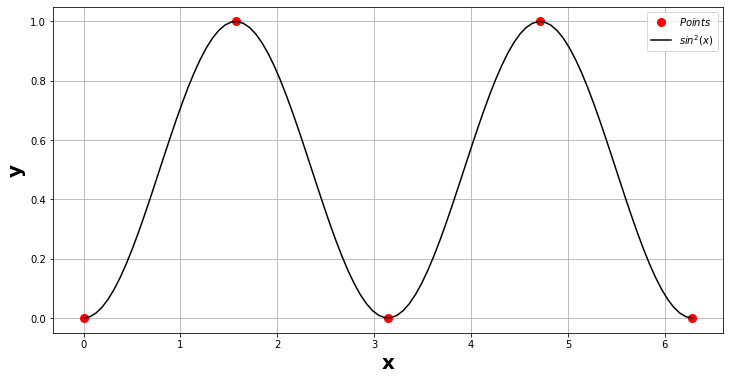

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 5  #Number of points
x = np.linspace(0,2*np.pi,N)  #Array of x positions
y = (np.sin(x))**2   #y = f(x)
yprime = (np.sin(2*x))  #y' = f'(x)

w = np.linspace(0,2*np.pi,100)  #Numpy array with the x-coordinates to plot the functions
fw = (np.sin(w))**2  #Numpy array with the y-coordinates to plot sin^2(x)

plt.figure(figsize = (12,6))
font = {'family':'Georgia', 'weight':'bold', 'size':20}
plt.plot(x,y,label='$Points$',color='red',marker='o',linestyle='',markersize=8) 
plt.plot(w,fw,label='$sin^2(x)$',color='black')
plt.xlabel('x', **font)
plt.ylabel('y', **font)
plt.legend()
plt.grid()
plt.show

### Lagrange polynomial and points

In [2]:
def lagrange(X,Y,w):
    '''
    Parameter:
    ----------
    X: numpy array with the x-coordinates of the interpolation points.
    Y: numpy array with the y-coordinates of the interpolation points.
    w: numpy array with the x-coordinates to plot Lagrange polynomial.
    
    Returns:
    ----------
    Pf: numpy array with the y-coordinates to plot Lagrange polynomial.
    '''
    Y=Y[np.argsort(X)]
    X=X[np.argsort(X)]
    n=np.size(X)
    P0=np.empty(shape=(n,n),dtype=object)
    Ps=np.empty(shape=(n),dtype=object)
    for i in range(n):
        for j in range(n):
            if i!=j:
                P0[i][j]=(w-float(X[j]))/(float(X[i])-float(X[j])) 
            else:
                P0[i][j]=1   
        Ps[i]=np.prod(P0[i]) #numpy array with the polynomials P_i(x)
    Pf = (Ps*Y).sum() #Pf(x) = y_0*P_0(x) + y_1*P_1(x) + ... + y_n*P_n(x) 
    return Pf

<function matplotlib.pyplot.show(*args, **kw)>

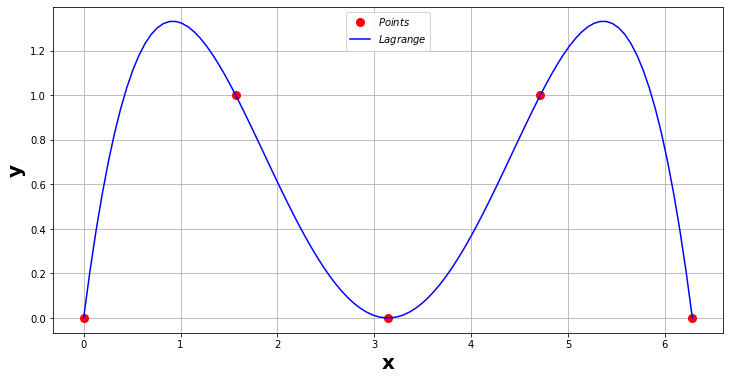

In [3]:
plt.figure(figsize = (12,6))
font = {'family':'Georgia', 'weight':'bold', 'size':20}
plt.plot(x,y,label='$Points$',color='red',marker='o',linestyle='',markersize=8) 
plt.plot(w,lagrange(x,y,w),label='$Lagrange$',color='blue')
plt.xlabel('x', **font)
plt.ylabel('y', **font)
plt.legend()
plt.grid()
plt.show

### Hermite polynomial and points

In [4]:
def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
# and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
# differences using derivatives
       a[2*i+1] = yprime[i]
       a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
    
def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum 

<function matplotlib.pyplot.show(*args, **kw)>

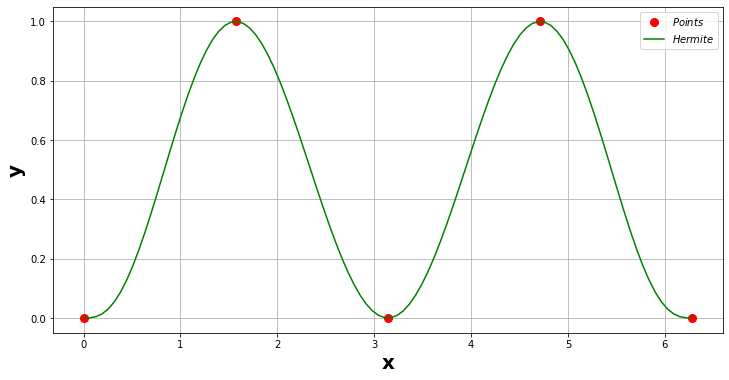

In [5]:
plt.figure(figsize = (12,6))
font = {'family':'Georgia', 'weight':'bold', 'size':20}
plt.plot(x,y,label='$Points$',color='red',marker='o',linestyle='',markersize=8) 
plt.plot(w,hermite(x,y,yprime,w),label='$Hermite$',color='green')
plt.xlabel('x', **font)
plt.ylabel('y', **font)
plt.legend()
plt.grid()
plt.show

### Lagrange polynomial vs Hermite polynomial

<function matplotlib.pyplot.show(*args, **kw)>

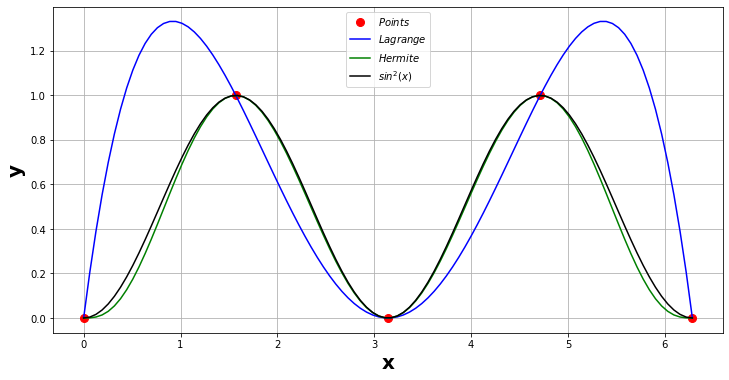

In [6]:
plt.figure(figsize = (12,6))
font = {'family':'Georgia', 'weight':'bold', 'size':20}
plt.plot(x,y,label='$Points$',color='red',marker='o',linestyle='',markersize=8) 
plt.plot(w,lagrange(x,y,w),label='$Lagrange$', color='blue')
plt.plot(w,hermite(x,y,yprime,w),color='green',label='$Hermite$')
plt.plot(w,fw,label='$sin^2(x)$',color='black')
plt.xlabel('x', **font)
plt.ylabel('y', **font)
plt.legend()
plt.grid()
plt.show

Clearly, Hermite polynomial gives the best approximation to the real function. Let's see the error function $E(x)=\left | f(x)-P(x) \right | $ for each polynomial.

<function matplotlib.pyplot.show(*args, **kw)>

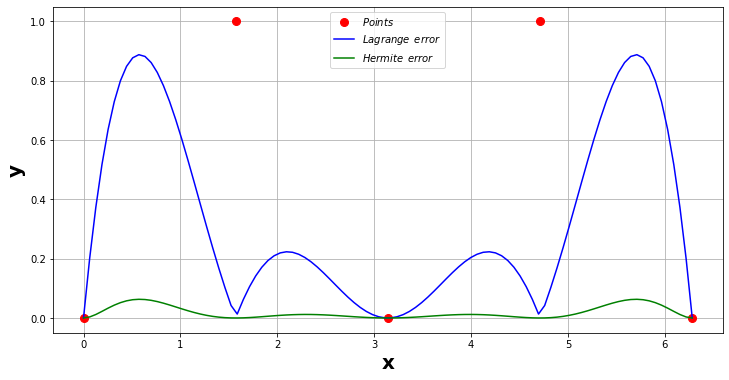

In [7]:
plt.figure(figsize = (12,6))
font = {'family':'Georgia', 'weight':'bold', 'size':20}
plt.plot(x,y,label='$Points$',color='red',marker='o',linestyle='',markersize=8) 
plt.plot(w,np.abs(fw-lagrange(x,y,w)),label='$Lagrange \enspace error$', color='blue')
plt.plot(w,np.abs(fw-hermite(x,y,yprime,w)),color='green',label='$Hermite \enspace error$')
plt.xlabel('x', **font)
plt.ylabel('y', **font)
plt.legend()
plt.grid()
plt.show

The Lagrange polynomial error is greater than the Hermite polynomial error for the whole interval $\left [ 0, 2\pi \right ]$, except when $x=x_i$ ($x_i$ is the ith $x$ term of the initial interpolation points). The Hermite polynomial aproximation is the best.